# DTSA 5509 Supervised Learning Final Project

## Project Overview

Banks have been using machine learning to improve their customer interactions. They wish to know what customers want so they can offer the right financial products at the right time. With the knowledge, tellers and customer support agents can make effective recommendations, and they can optimize the marketing campaigns, such as direct mail distribution and banner ads on their internet banking sites. They develop “propensity to buy” models to predict the likelihood of each customer to buy each product. Despite the name implies, classification algorithms are used as opposed to regression algorithms.

In this project, I used a publicly available banking marketing campaign dataset to build supervised classifiers and assessed how well the models predict the customer response.


## Data

The data was downloaded from UCI Machine Learning Repository. The data source is stated as: 

`[Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014`

The data was available in CSV format, accompanied by metadata definition files. It includes four data sets:  1) original version of 45,211 entries with 17 fields. 2) 10% sample of 4,521 entries from 1). 3) updated version of 41,188 entries with 20 fields. 4) 10% sample of 4119 entries from 3).  The smaller versions were provided to be less computing resource intensive in 2014. It is not much of an issue in 2022, and I only used the dataset 3).


In [1]:
# Import basic libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Load the downlorded CSV data

df = pd.read_csv('bank-additional/bank-additional-full.csv', sep=";")

## Data Cleaning Steps

The dataset contains 11 object, 5 float and 5 integer fields. First, I checked the distribution of the object fields to find out if they are categorical values (or something else), if they have irregular values, and if they show healthy distributions. 

Then I used `pandas.DataFrame.describe()`, histograms and boxplots to check the distributions of numeric fields.


---data type counts---
object     11
int64       5
float64     5
dtype: int64

---label counts---
y
no     36548
yes     4640
Name: age, dtype: int64

---object fields overview---
++++++++++++job+++++++++++++++++
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
++++++++++++marital+++++++++++++++++
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64
++++++++++++education+++++++++++++++++
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64
++++++++++++default+++++++++++++++++
no         3

<Figure size 2592x1728 with 0 Axes>

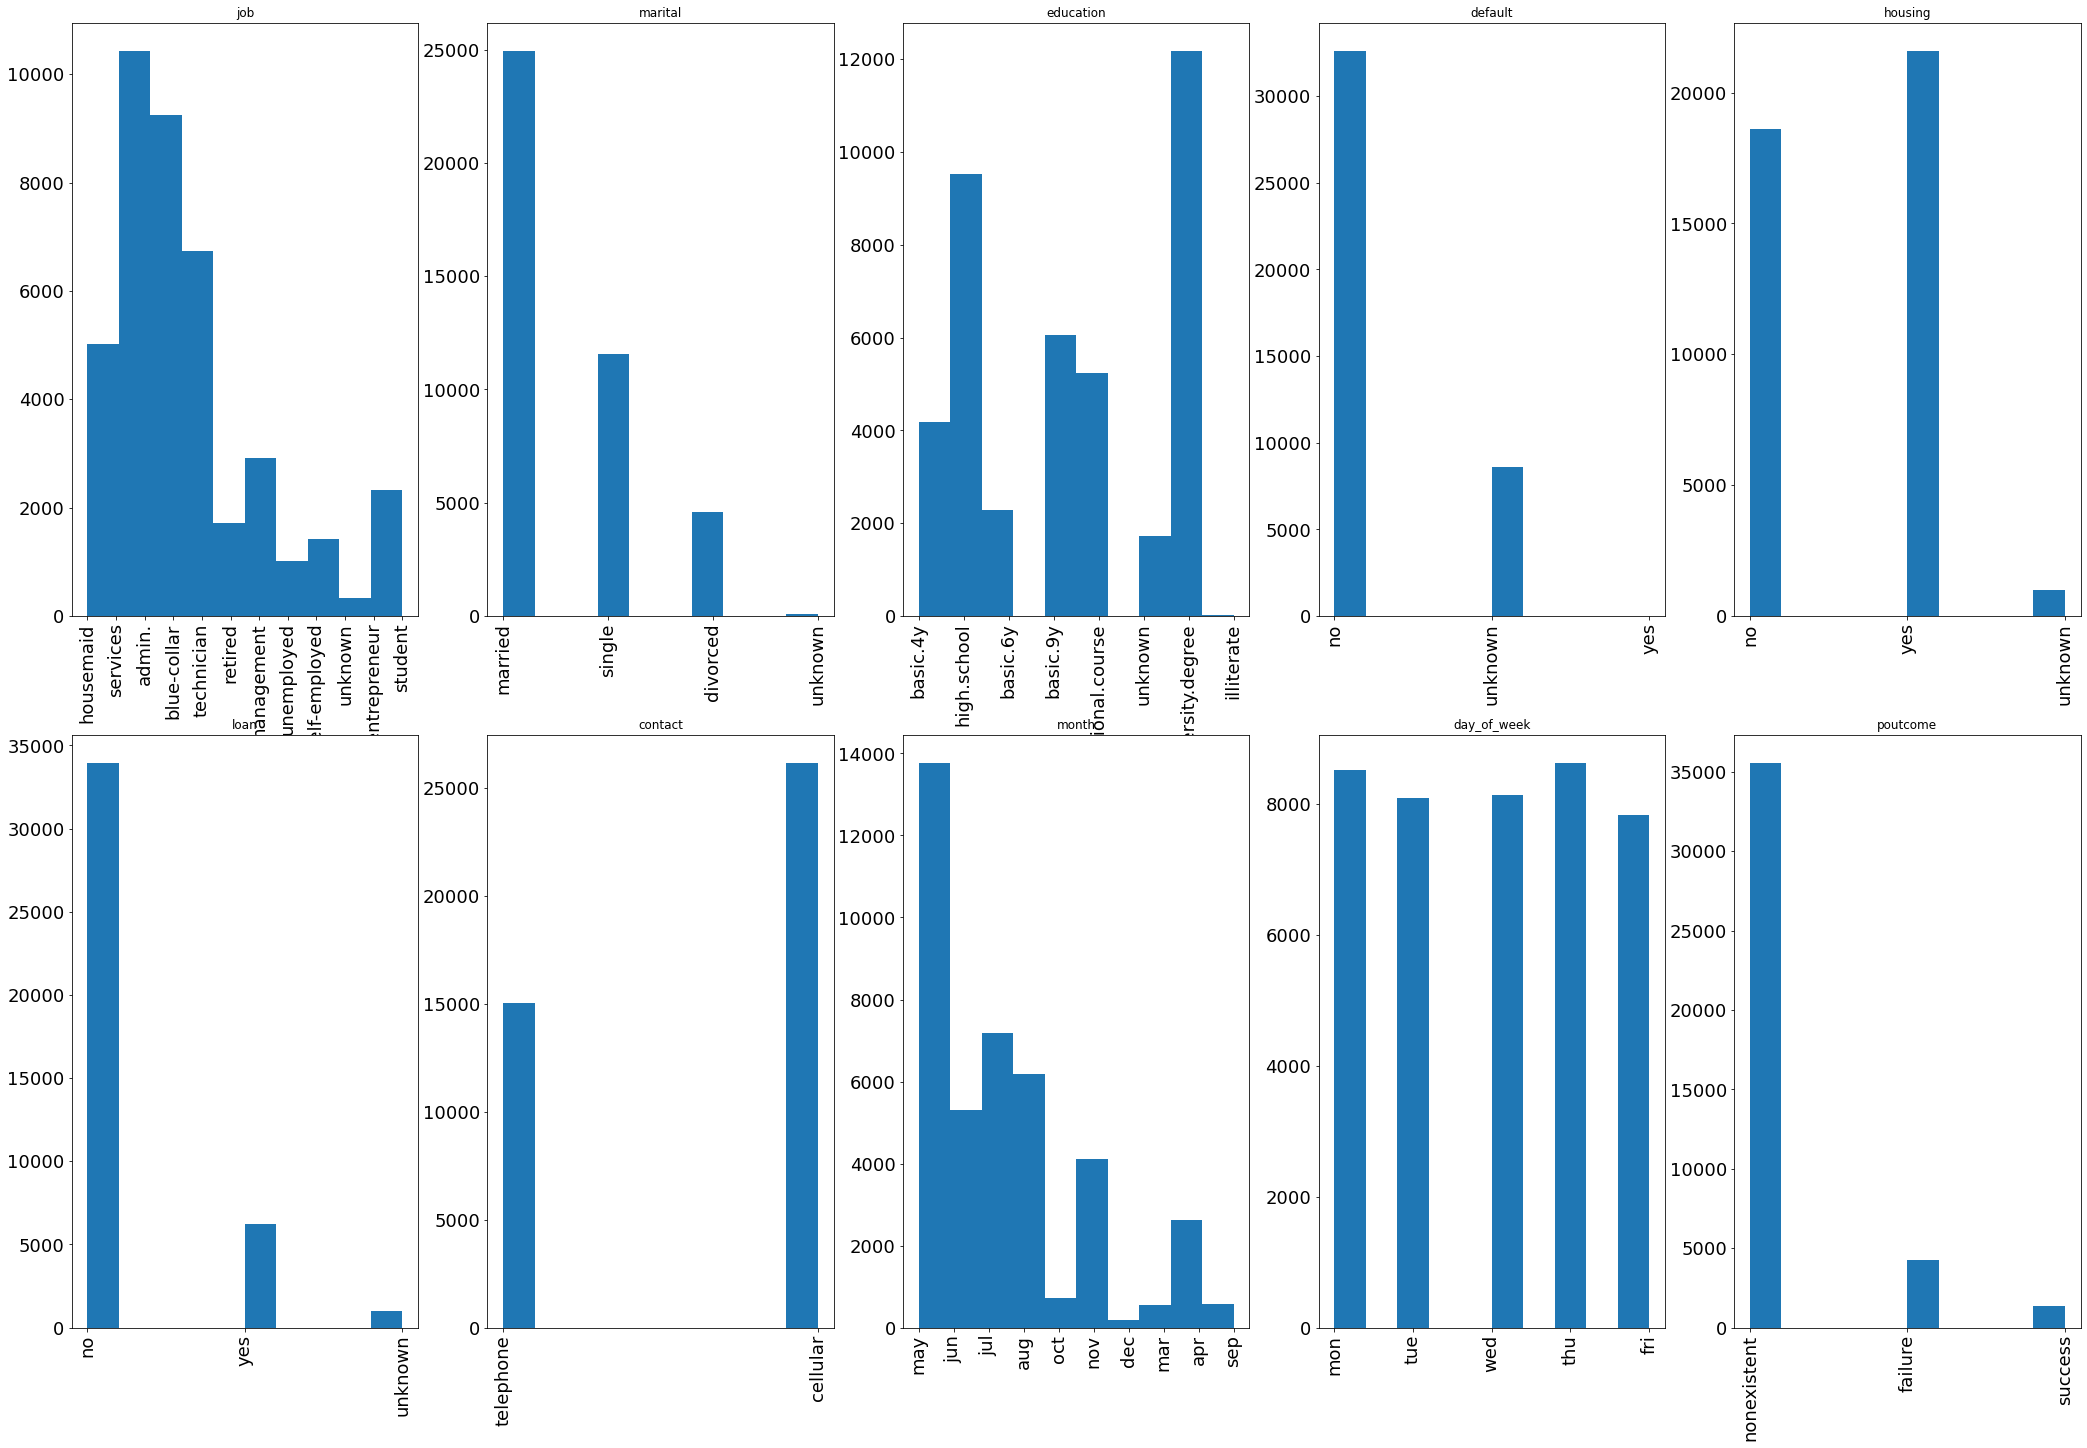

In [3]:
# Interactive investigations

print ("---data type counts---")
print (df.dtypes.value_counts())
print ("\n---label counts---")
print (df.groupby('y').count()['age'])

# Find out what those "object" fields are

print ("\n---object fields overview---")
for col in df.columns:
    if df[col].dtypes=='object' and col !='y':
        print (f"++++++++++++{col}+++++++++++++++++")
        print (df[col].value_counts())

nrows = 2
ncols = 5
row = 0
col = 0

fig = plt.figure(figsize=(36,24))
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(36,24))

# Draw histograms

for c in df.columns:
    if df[c].dtypes=='object' and c !='y':
        axes[row][col].tick_params(axis='x',labelsize=18,labelrotation=90)
        axes[row][col].tick_params(axis='y',labelsize=18)
        axes[row][col].set_title(c)
        axes[row][col].hist(df[c])
        col = col + 1
        if col > 4:
            row = row + 1
            col = 0


Below shows the overview and distribution in histogram and boxplots for the numerical fields.

In [4]:
# Integer and float data
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


<Figure size 2592x1728 with 0 Axes>

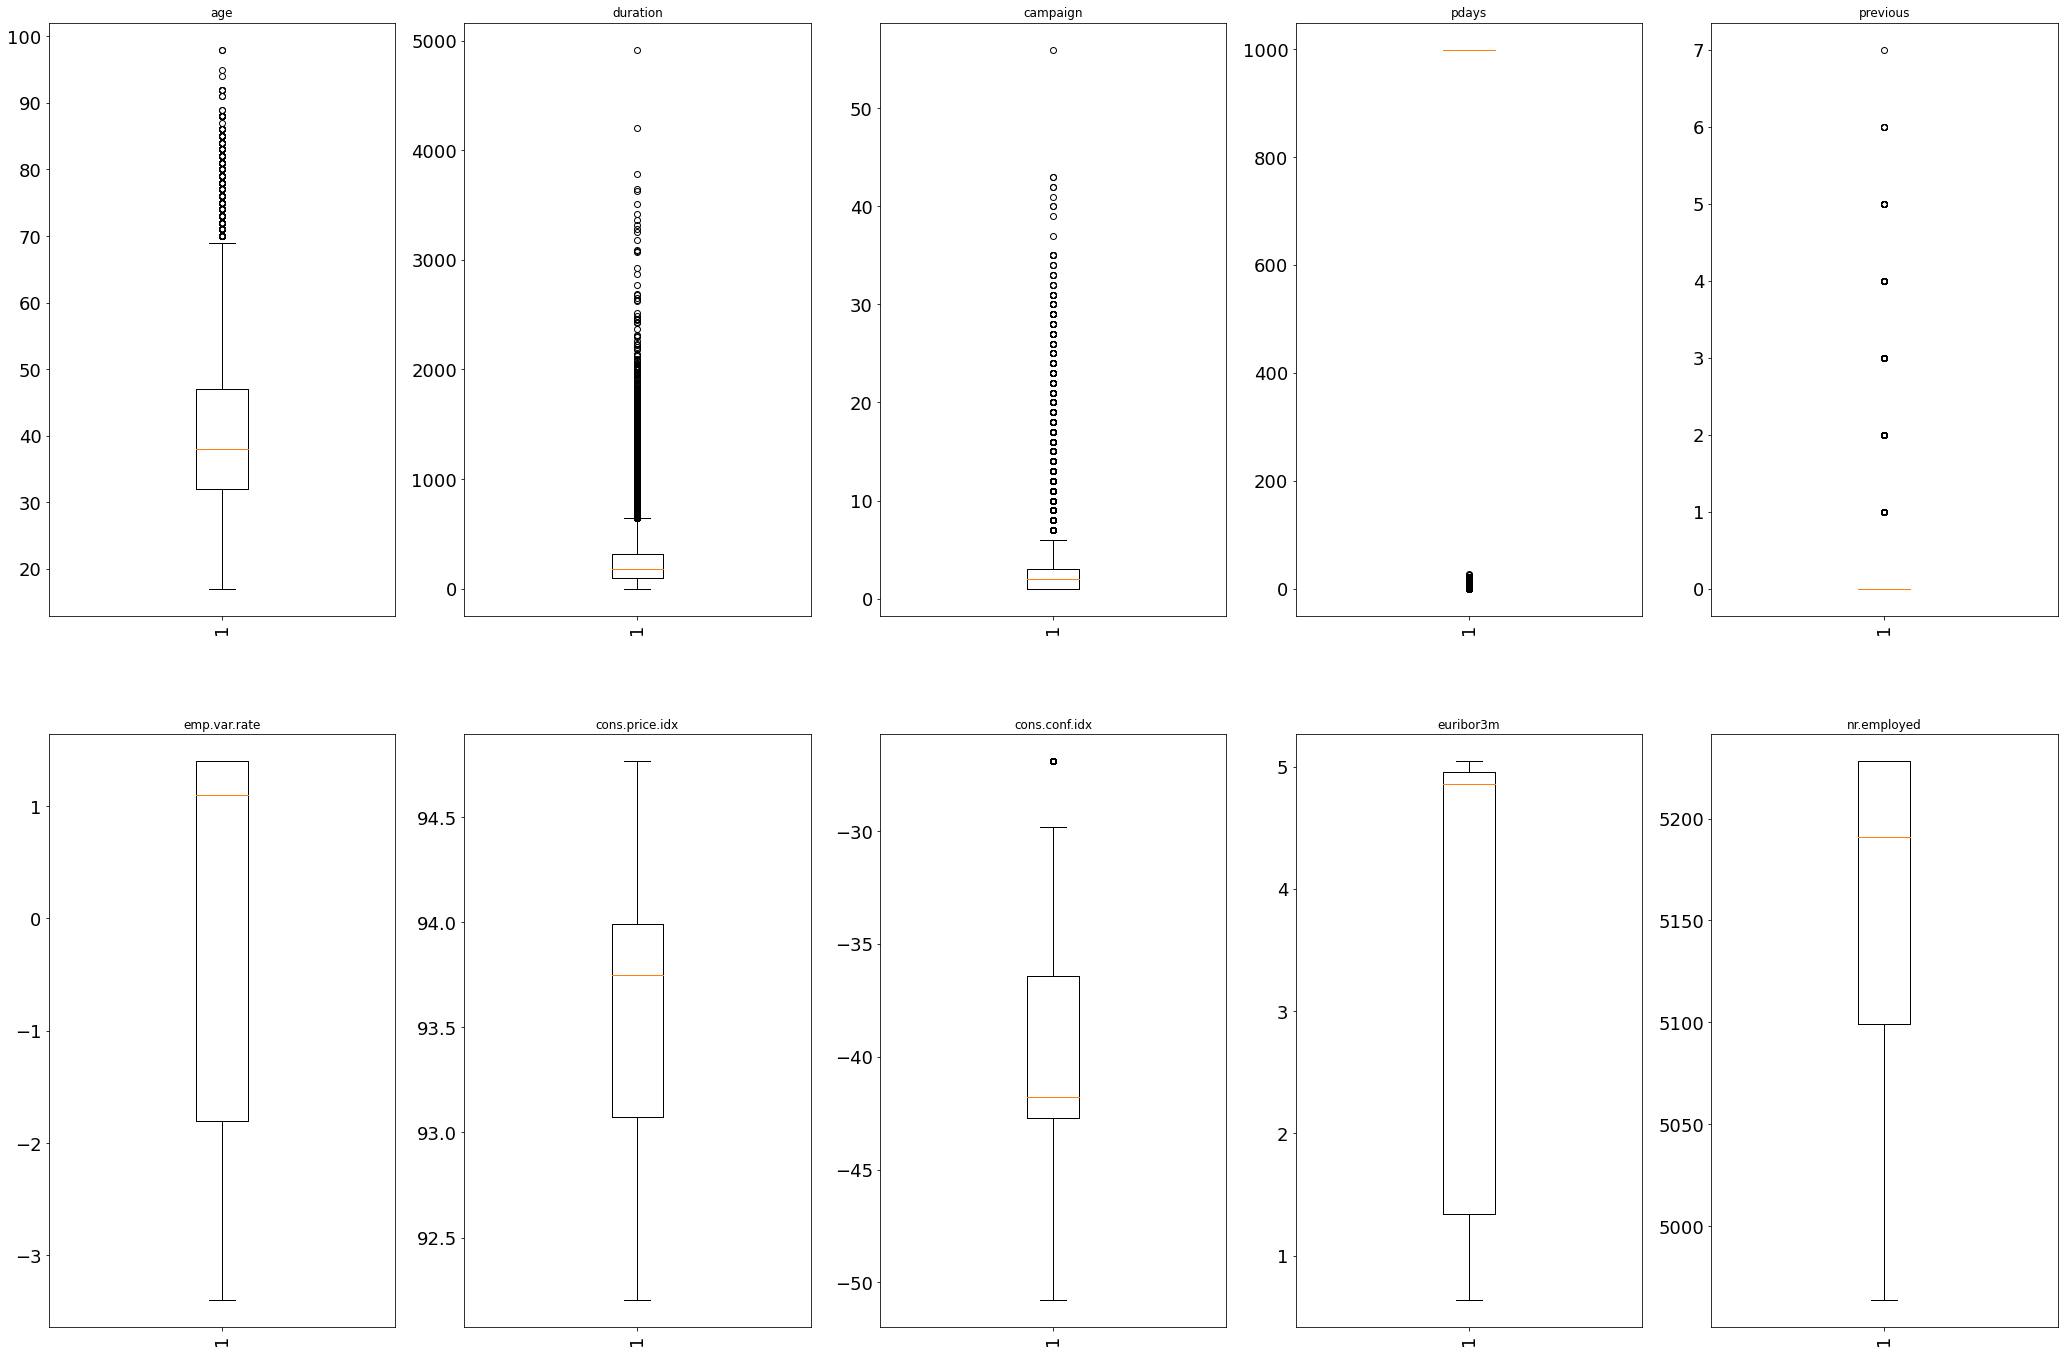

<Figure size 2592x1728 with 0 Axes>

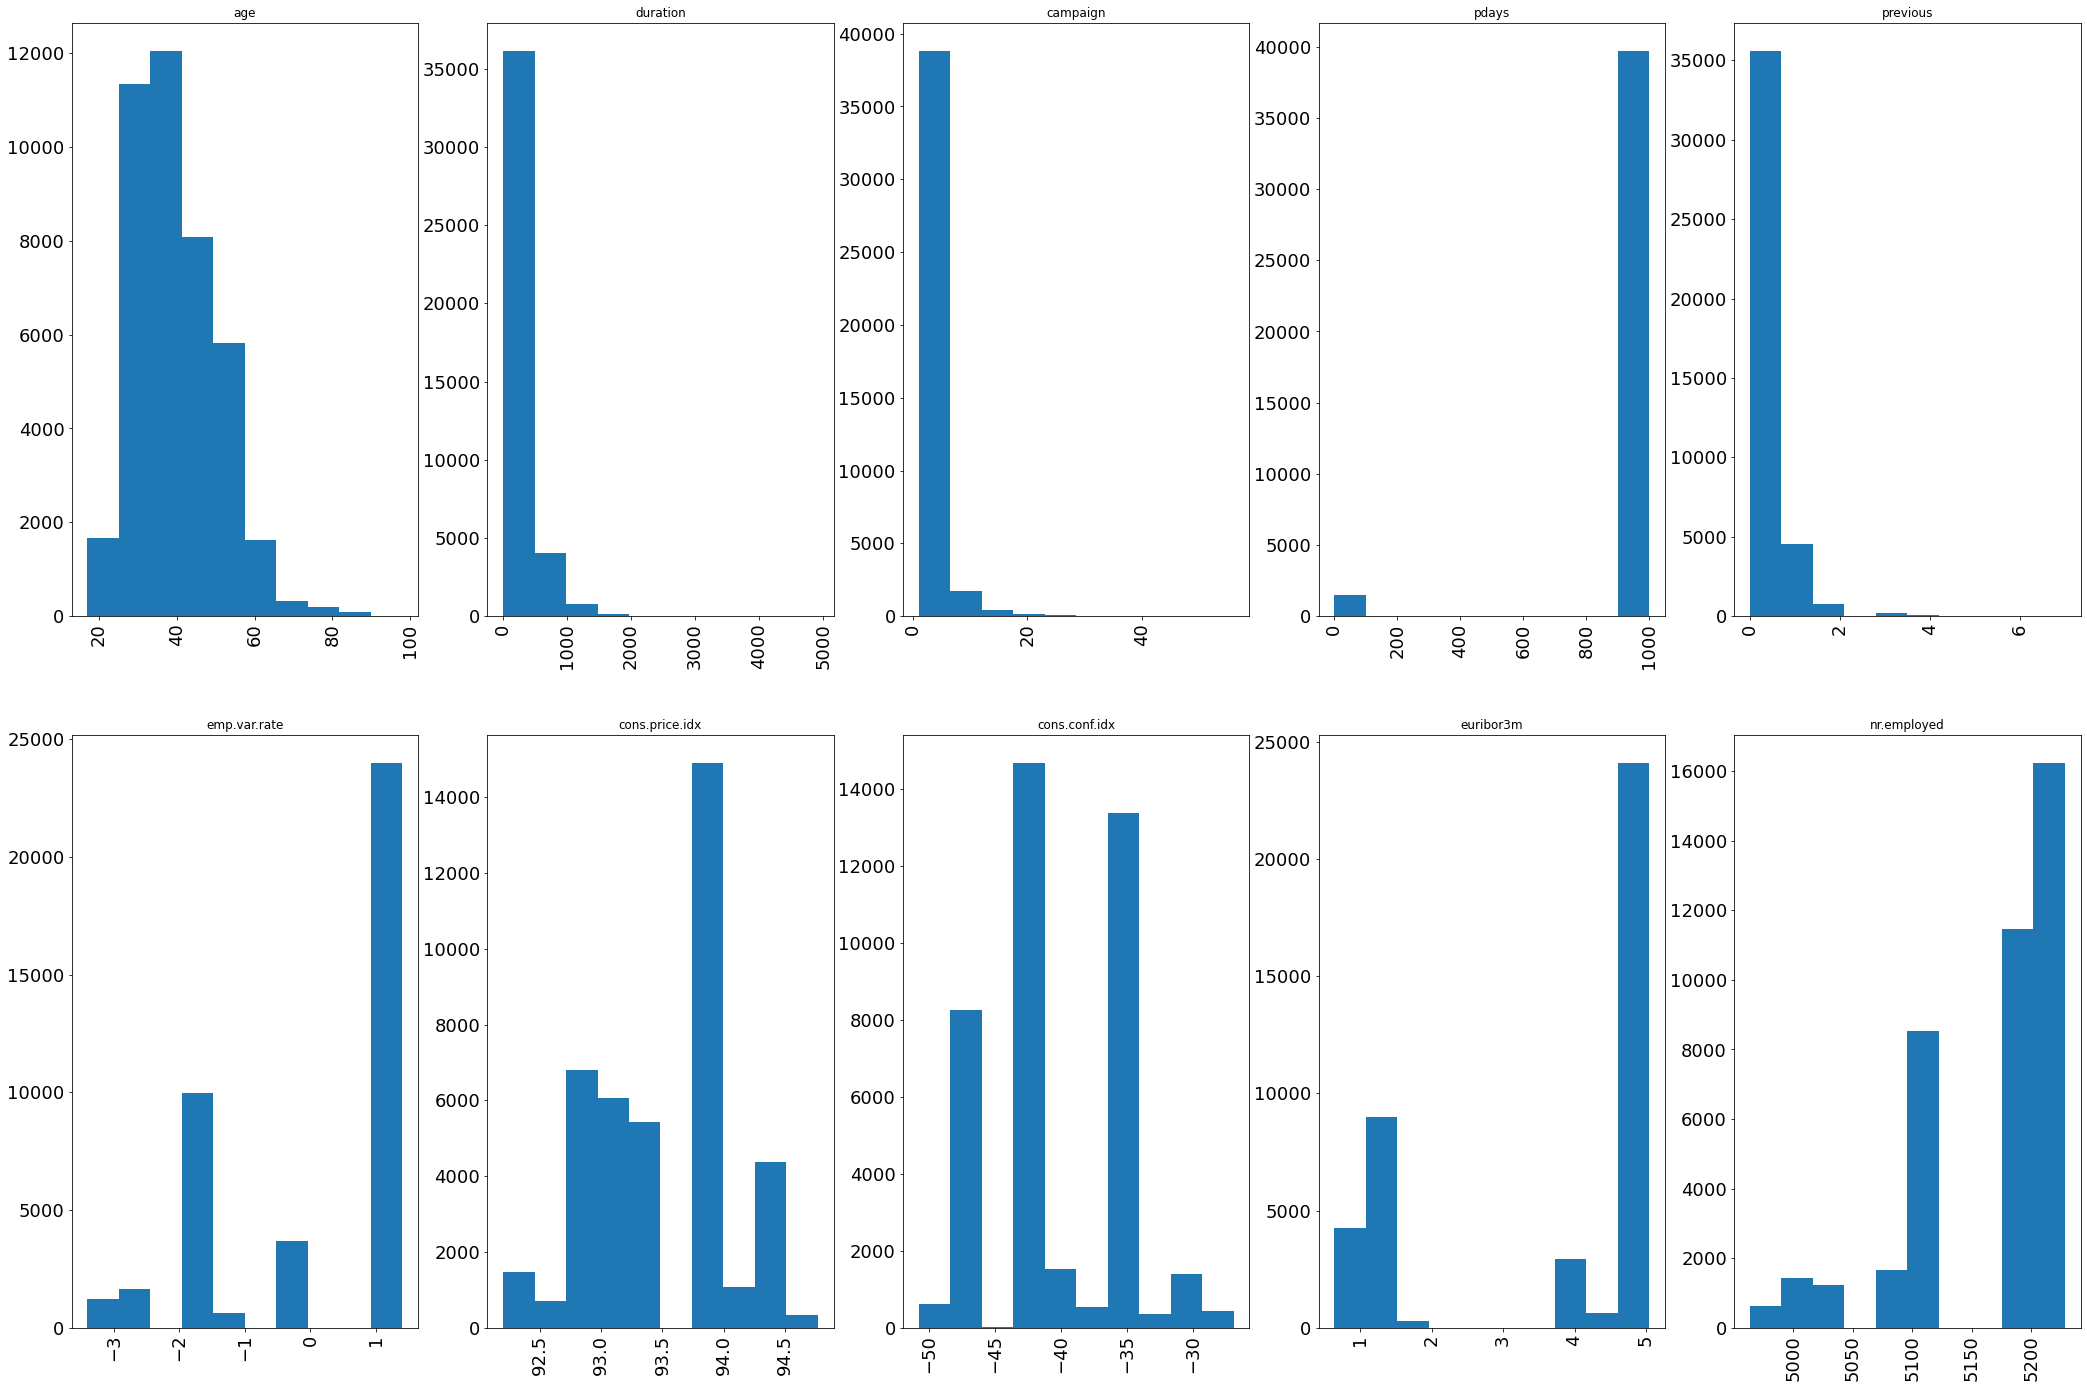

In [5]:
# Distrubitions

# Boxplots

fig = plt.figure(figsize=(36,24))
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(36,24))

row = col = 0
for c in df.columns:
    if df[c].dtypes in ['int64','float64']:
        axes[row][col].tick_params(axis='x',labelsize=18,labelrotation=90)
        axes[row][col].tick_params(axis='y',labelsize=18)
        axes[row][col].set_title(c)
        axes[row][col].boxplot(df[c])
        col = col + 1
        if col > 4:
            row = row + 1
            col = 0

plt.show()

# Histograms

fig = plt.figure(figsize=(36,24))
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(36,24))
row = col = 0
for c in df.columns:
    if df[c].dtypes in ['int64','float64']:
        axes[row][col].tick_params(axis='x',labelsize=18,labelrotation=90)
        axes[row][col].tick_params(axis='y',labelsize=18)
        axes[row][col].set_title(c)
        axes[row][col].hist(df[c])
        col = col + 1
        if col > 4:
            row = row + 1
            col = 0
plt.show()

## Data Cleanup Steps, continued

### Handling null values

The target variable y had 36,548 No values and 4,640 Yes values. 

All the object fields turned out to be categorical fields. Some categorical fields contained "unknown" values. Based on the distribution and correlations with the target variable (investigated interactively), I decided to process each field with “unknown” respectively as follows:

1.	job: “unknown” carries certain meaning and they should be in its own category
2.	martial: “unknown” had a response rate that was closest to "single" so replace it with "single."
3.	default: default is as in bankruptcy. As such “unknown” carries certain meaning and they should be in its own category
4.	housing: “unknown” is replaced with “No” since they are more likely not to have mortgage.
5.	loan: “unknown” is replaced with “Yes” since assuming existing loans would be safer.

I did not find NULL value from numeric fields.

### Handling outliers
1.	education==illiterate: It does not look like a proper value, and there were only 18 records. Those records were removed.
2.	default ==Yes: The records were very few, and they would be excluded from campaigns anyways. Those records were removed.
3.	campaign (number of past campaign participations): there were outliers up to 5SDs. They were floored down to be around to 3SDs.
4.	precious contact: Very few records had numbers greater than 1. Converted them to 1. 

Other categorical fields did not show any negligibly small values (less than 10% of the nearest values)

Other numerical fields’ max and min values are within the range of between -3SDs and +3SDs. 

### Removal of fields
I decided to remove the following fields from the models.
1.	postcome: Showing outcome from the previous campaign. Most likely they would not be included in the future campaign.
2.	duration: The call duration is not available beforehand.
3.	pdays : Days since the previous contact. Too skewed.

### Numerical conversion
Values of binary fields, such as with Yes/No values, were converted to 0 and 1.



In [100]:
# Data cleansing

# reload the source file for my convenience
df = pd.read_csv('bank-additional/bank-additional-full.csv', sep=";")

# martial.unkowns -> single
df['marital'] =  pd.Series(["single" if df['marital'][i] == 'unknown' else df['marital'][i] for i in range(len(df['marital']))])

# ignore education.illiterate
df = df[df.education != 'illiterate']
df.reset_index(inplace=True)

df = df[df['default'] != 'yes']
df.reset_index(inplace=True)

# Unknown values handling for housing and loan
df['housing'] =  pd.Series(["no" if df['housing'][i] == 'unknown' else df['housing'][i] for i in range(len(df['loan']))])
df['loan'] =  pd.Series(["yes" if df['loan'][i] == 'unknown' else df['loan'][i] for i in range(len(df['loan']))])

# Aggregate values for campaign and previous
df['campaign'] =  pd.Series([10 if df['campaign'][i] > 9 else df['campaign'][i] for i in range(len(df['campaign']))])
df['previous'] = pd.Series([1 if df['previous'][i] >=1 else 0 for i in range(len(df['previous']))])

df.drop(['level_0','index'], axis=1, inplace=True)

# Drop unnecessary columns
df. drop(['poutcome','duration','pdays'],axis=1, inplace=True)

# Convert binary columns to {0,1}, including the target column (y)
df['default'] =  pd.Series([1 if df['default'][i] == 'unknown' else 0 for i in range(len(df['default']))])

df['housing'] =  pd.Series([1 if df['housing'][i] == 'yes' else 0 for i in range(len(df['housing']))])
df['loan'] =  pd.Series([1 if df['loan'][i] == 'yes' else 0 for i in range(len(df['loan']))])
df['contact'] =  pd.Series([1 if df['contact'][i] == 'cellular' else 0 for i in range(len(df['contact']))])

df['y'] =  pd.Series([1 if df['y'][i] == 'yes' else 0 for i in range(len(df['y']))])


## Exploratory Data Analysis

The values of "months" and "week" fields affected the response rates, but the patterns are not in order as shown in the charts below. As such, I calculated the response rate for each month and week, and replace the week and the month with the respective response rate.

After converting the categorical fields into indicator fields using `pandas.getdummies()`, I generated the heatmap for the correlations. It showed some strong correlations between some predictor variables, but not strong correlations toward the target variable.



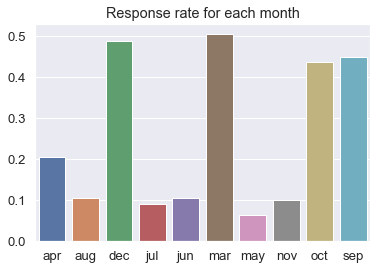

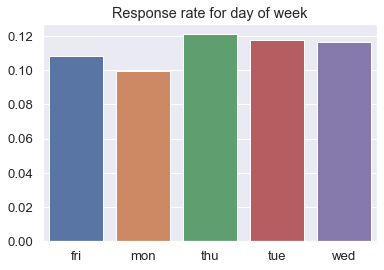

In [101]:
month_sums = {}  # {'month':(positive, total)}
for ind in df.groupby(['month','y']).count()['age'].index:
    month = ind[0]
    val= ind[1]
    cnt = df.groupby(['month','y']).count()['age'].get(ind)
    
    if (month in month_sums):
        pos = month_sums[month][0]
        tot = month_sums[month][1]
        month_sums[month] = (pos+val*cnt, tot+cnt)
    else:
         month_sums[month] = (val*cnt, cnt)

# create a dictionary for the ratio
monthly_ratio = {}
for key in month_sums:
    monthly_ratio[key] = month_sums[key][0]/ month_sums[key][1]
    
# Draw a chart

vec_x = [k for k in monthly_ratio.keys()]
vec_y = [monthly_ratio[k] for k in vec_x]

sns.set(font_scale=1.2)
sns.barplot(x=vec_x, y=vec_y).set_title("Response rate for each month")
plt.show()

# Replace
df['month'] =  pd.Series([monthly_ratio[df['month'][i]] for i in range(len(df['month']))])

week_sums = {}  # {'month':(positive, total)}
for ind in df.groupby(['day_of_week','y']).count()['age'].index:
    week = ind[0]
    val= ind[1]
    cnt = df.groupby(['day_of_week','y']).count()['age'].get(ind)
    if (week in week_sums):
        pos = week_sums[week][0]
        tot = week_sums[week][1]
        week_sums[week] = (pos+val*cnt, tot+cnt)
    else:
        week_sums[week] = (val*cnt, cnt)

# create a dictionary for the ratio
weekly_ratio = {}
for key in week_sums:
    weekly_ratio[key] = week_sums[key][0]/ week_sums[key][1]
    
# Draw another chart for the day of the week

vec_x = [k for k in weekly_ratio.keys()]
vec_y = [weekly_ratio[k] for k in vec_x]

sns.set(font_scale=1.2)
sns.barplot(x=vec_x, y=vec_y).set_title("Response rate for day of week")
plt.show()

# Replace
df['day_of_week'] =  pd.Series([weekly_ratio[df['day_of_week'][i]] for i in range(len(df['day_of_week']))])


Text(0.5, 1.0, 'Correlation heatmap')

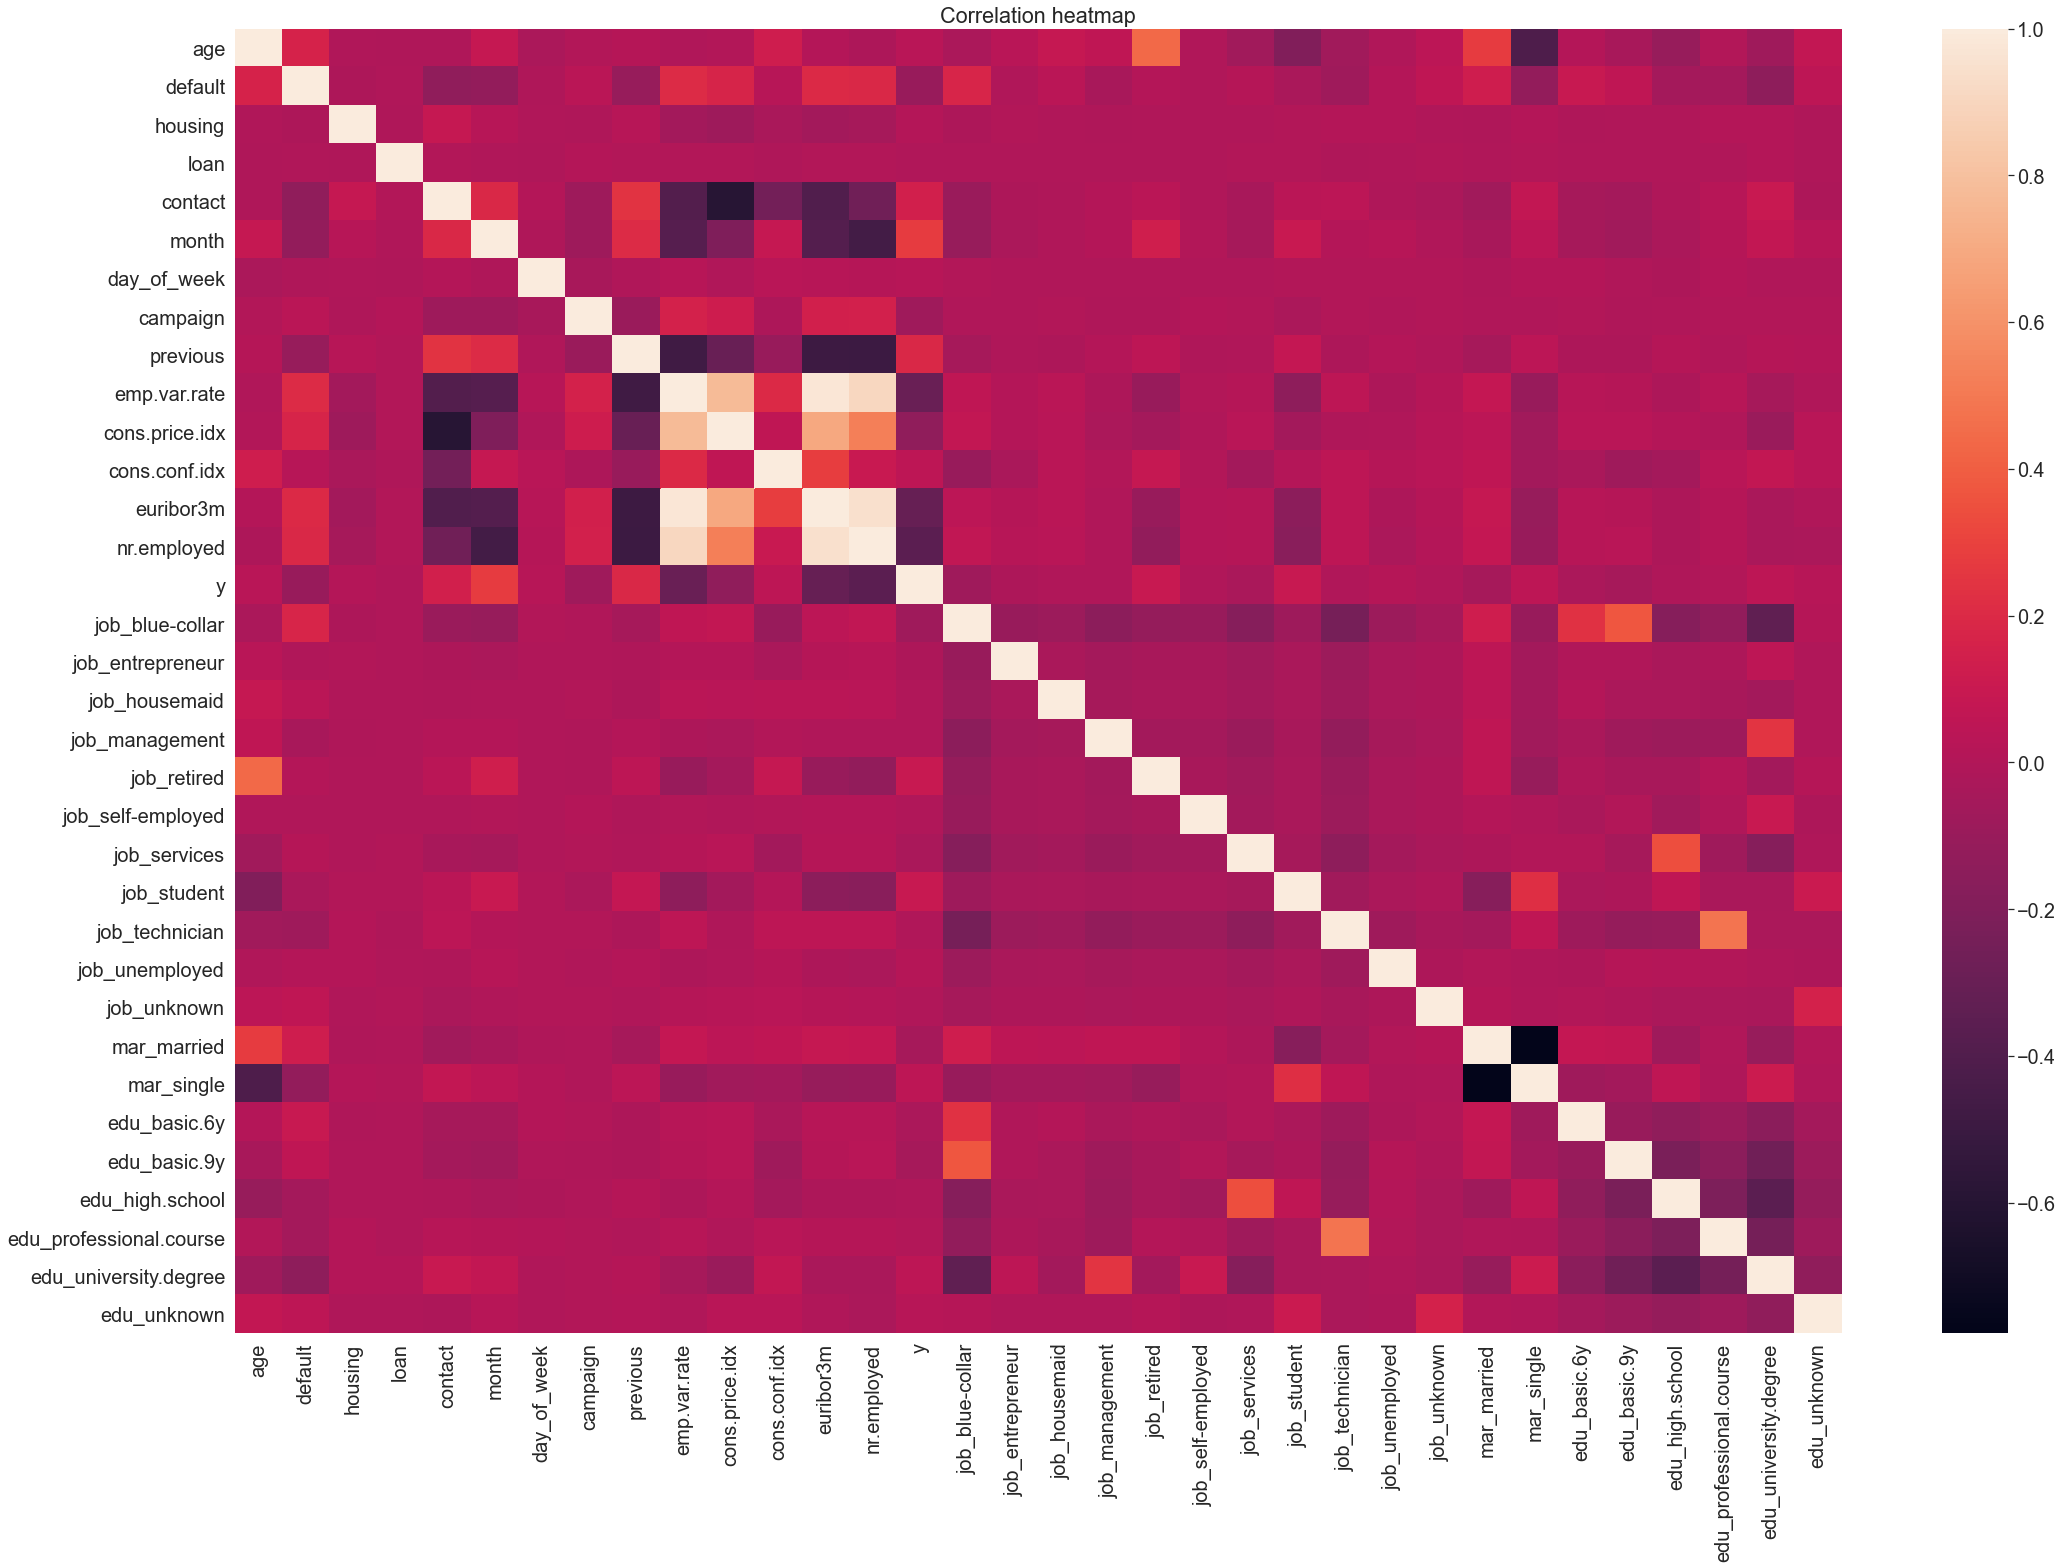

In [83]:
# Convert categorical data to index fields

df = pd.concat([df, pd.get_dummies(df['job'], drop_first=True, prefix='job')], axis=1)
df.drop('job',axis=1, inplace=True)

df = pd.concat([df, pd.get_dummies(df['marital'], drop_first=True, prefix='mar')], axis=1)
df.drop('marital',axis=1, inplace=True)

df = pd.concat([df, pd.get_dummies(df['education'], drop_first=True, prefix='edu')], axis=1)
df.drop('education',axis=1, inplace=True)

fig = plt.figure(figsize=(36,24))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

sns.set(font_scale=1.8)
sns.heatmap(df.corr()).set_title("Correlation heatmap")

## Exploratory Data Analysis Continued
To detect collinearity, I computed VIF for all the fields. Initially 5 fields showed greater than 10 VIF. After some experiments, I found that removing euribor3m and emp.var.rate will make all the VIF values less than 10. I concluded those two fields had collinearity and should be removed from the model. 

Then I generated a heatmap and a barchart for correlations.

Intuitively, none of the fields had strong correlation with the target variable, which calls for multivariable models. 


Text(0.5, 1.0, 'Correlations to the target')

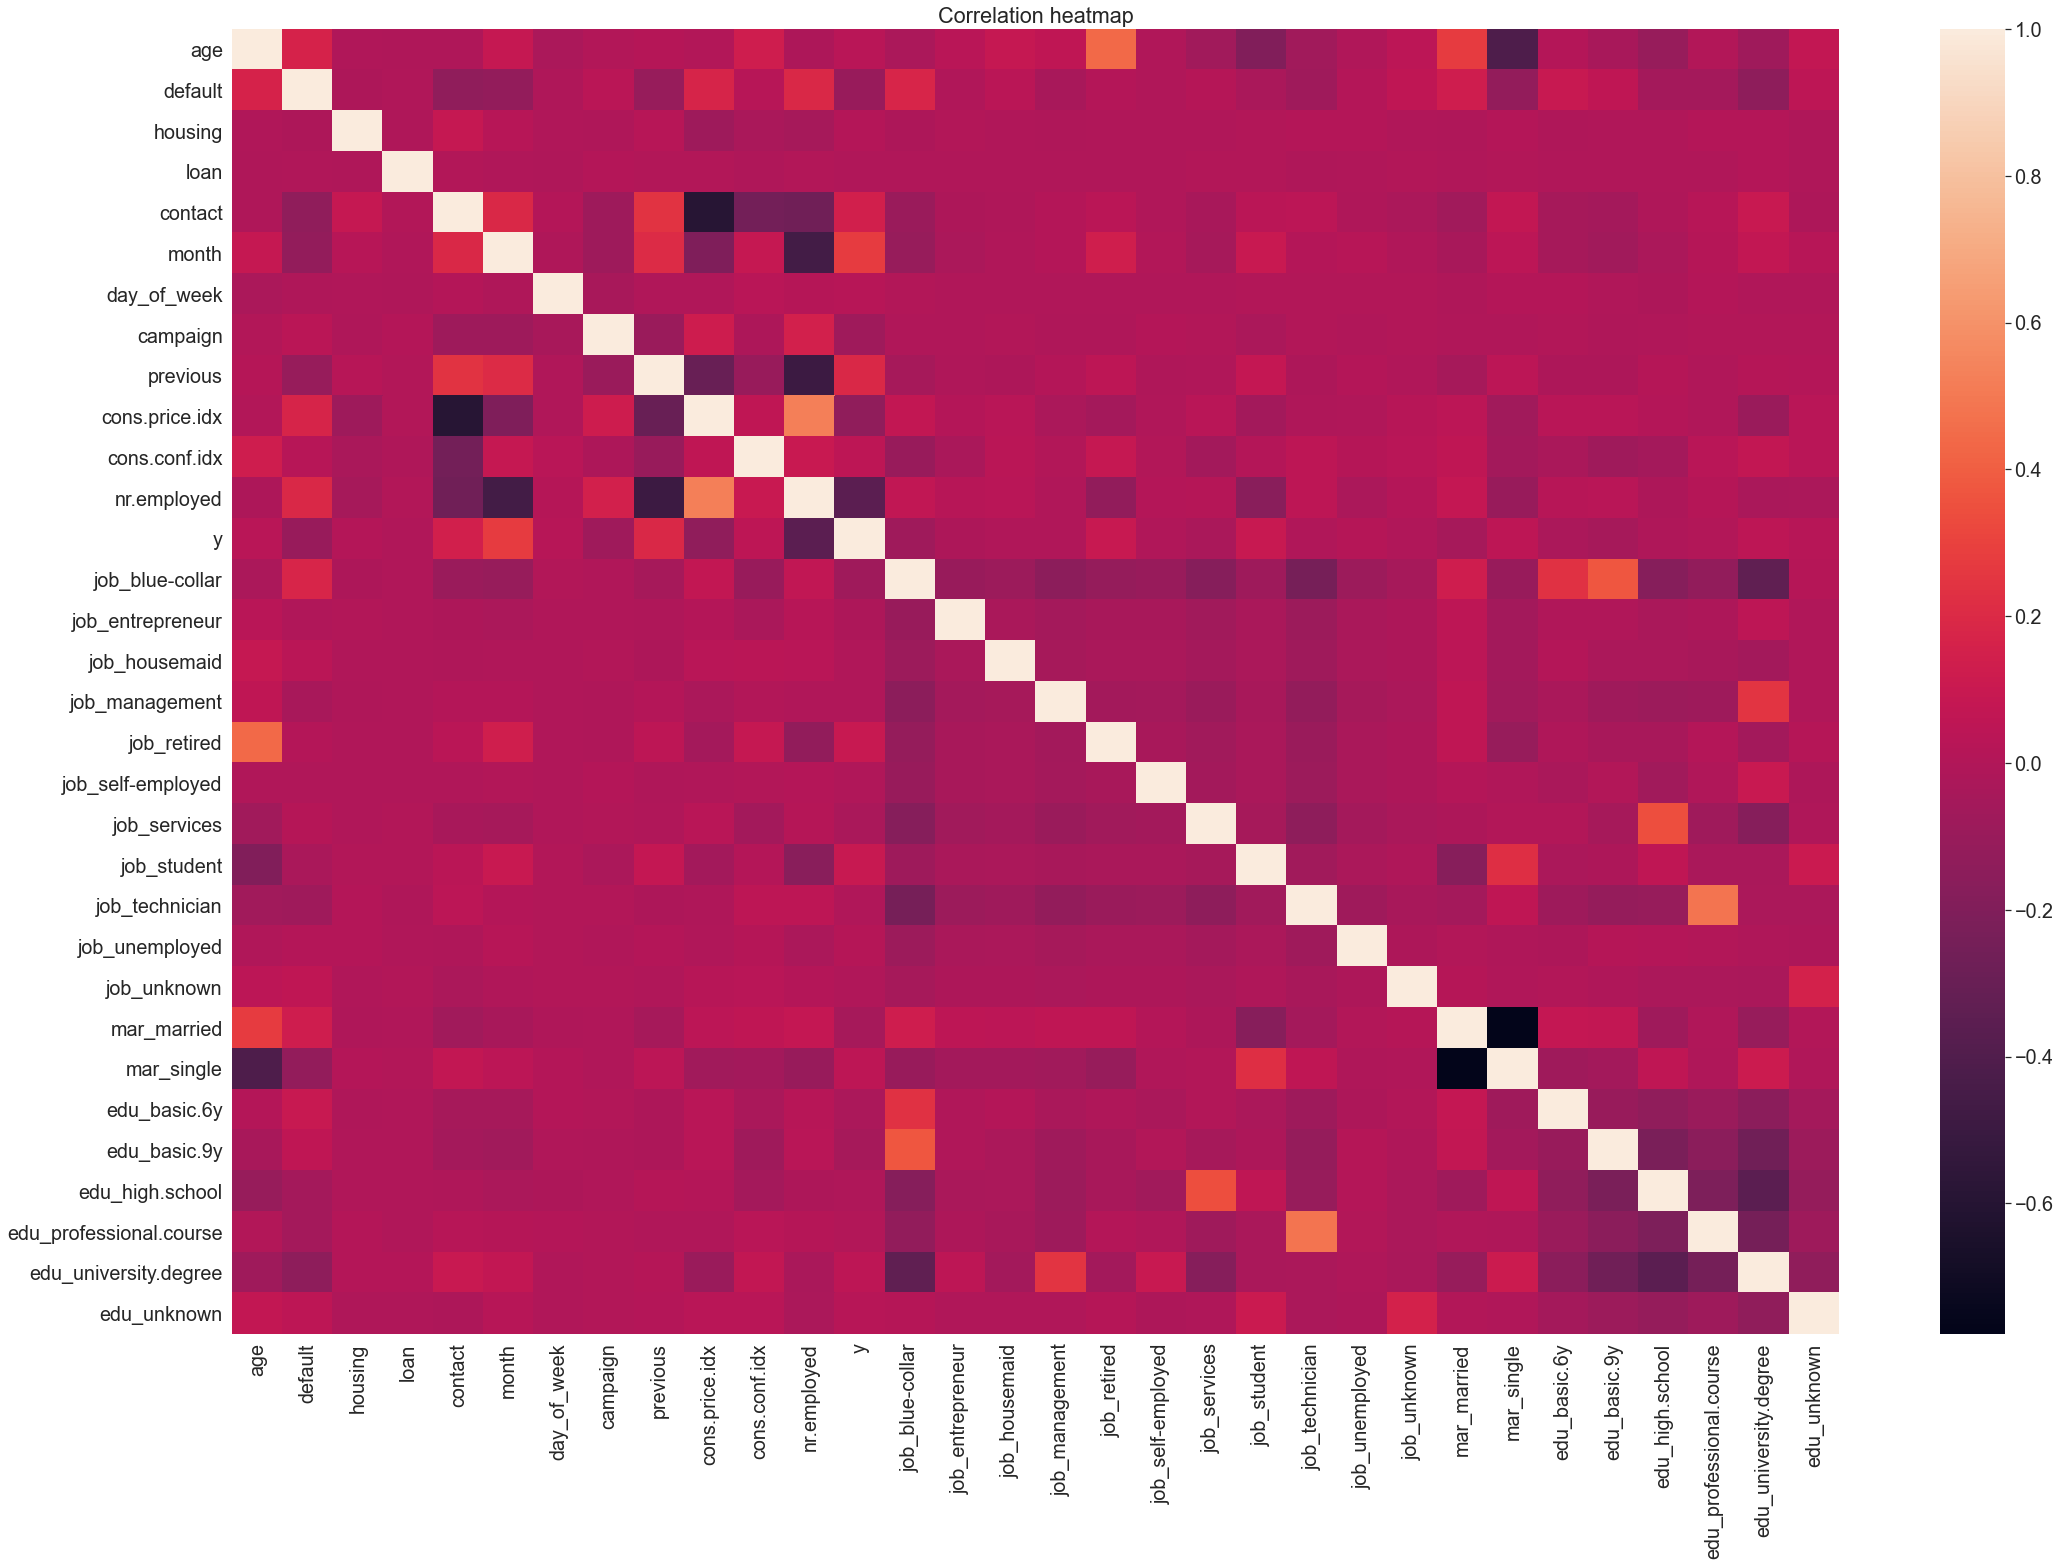

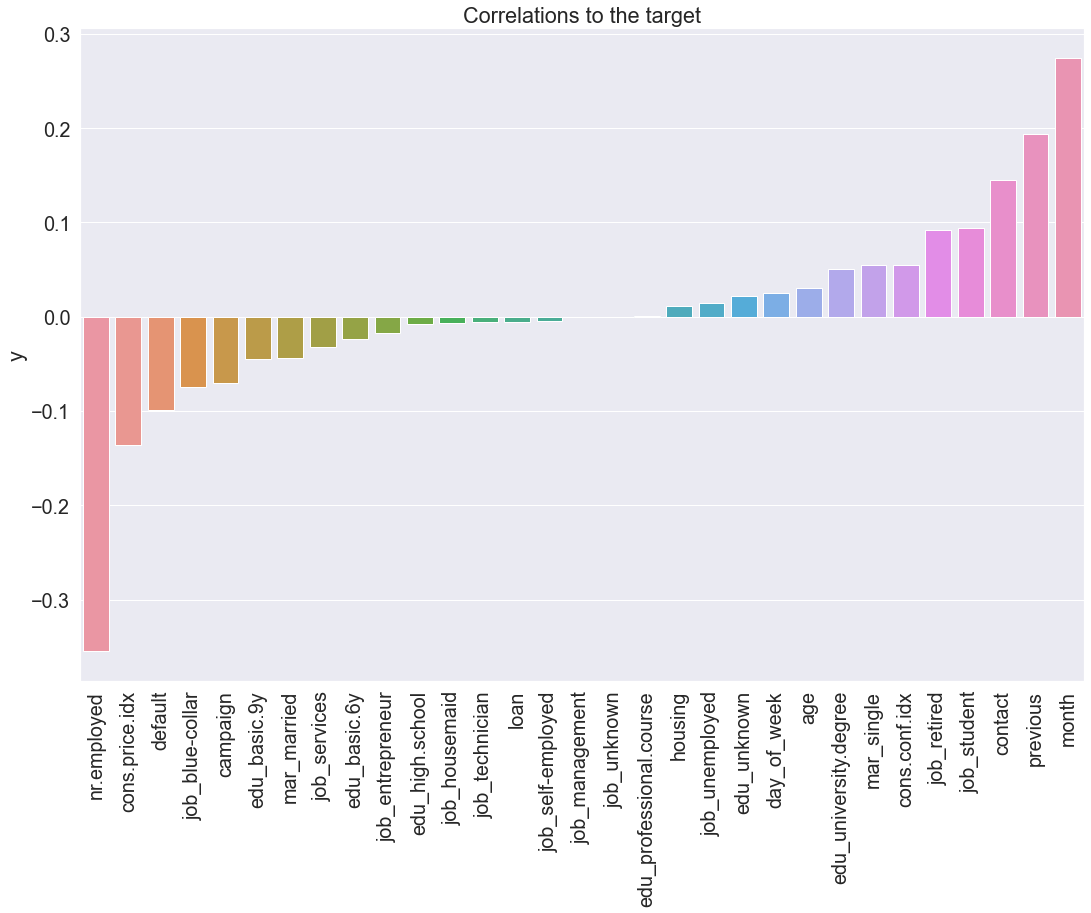

In [84]:
# VIF and tolerance computation

from sklearn.linear_model import LinearRegression 
vif, tolerance = {}, {}
   
for feature in df.columns:
    xx = [f for f in df.columns if f not in [feature,'y','euribor3m','emp.var.rate']]   # remove those two.

    xx, yy = df[xx], df[feature]
    r2 = LinearRegression().fit(xx, yy).score(xx, yy)                
    tolerance[feature] = 1 - r2
    vif[feature] = 1/(tolerance[feature])

df.drop(['euribor3m','emp.var.rate'],axis=1,inplace=True)
fig = plt.figure(figsize=(36,24))
sns.set(font_scale=1.8)

sns.heatmap(df.corr()).set_title("Correlation heatmap")

fig = plt.figure(figsize=(18,12))
plt.xticks(rotation=90)

sns.barplot(x=df.corr().sort_values(by='y',axis=0)['y'][:-1].index,y=df.corr().sort_values(by='y')['y'][:-1]).set_title("Correlations to the target")

## Models
After scaling the prepared data, I split them to 70% training and 30% test, and then trained a logistic regression model, logistic regression models with cross validation, a random forest model, and a support vector classifier model. 

Note that the values with high VIF had been removed, the features for month and week had been converted to response rates, and irrelevant fields such as past outcome and call duration had been excluded.

Then I tried hyperparameter tuning using Scikit Learn's GridSearchCV for random forest and support vector classifier.

## Results and Analysis

Logistic regression showed accuracy score of 0.889, while random forest showed 0.894 and support vector classifier showed 0.896 after the hyperparameter tuning. Considering logistic regression’s benefit of explainability (see the bar chart below), I would think these gains are negligibly small and logistic regression is the optimal model. 

However, the cross validation of the logistic regression resulted a useless optimal selection. In order to optimize the model further, some feature engineering is needed.  

The recall rate for y=1 is still low around 0.23, and it is reflected in the ROC curve and the AUC value. But the model is still valuable for marketing campaign because the response rate of the test population is 1398/(10953+1398)=11.3% and the response rate fully trusting the model output is 323/(1075+323)=23.1%, which means 104% gain. The number of responses would be small due to the low recall rate, though. By carefully selecting the cut-off score, the gain could be even bigger.


-----------------logistic regressions-------------
Classification Report

              precision    recall  f1-score   support

           0       0.91      0.97      0.94     10953
           1       0.53      0.23      0.32      1398

    accuracy                           0.89     12351
   macro avg       0.72      0.60      0.63     12351
weighted avg       0.87      0.89      0.87     12351

Confusion Matrix

[[10662   291]
 [ 1075   323]]

accuracy score 0.8894016678811433


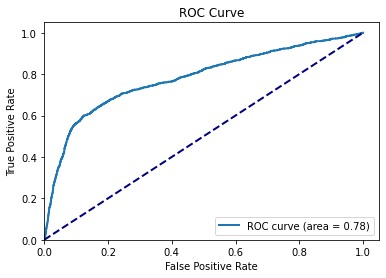

-----------------CV logistic regressions-------------
Classification Report

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     10953
           1       0.00      0.00      0.00      1398

    accuracy                           0.89     12351
   macro avg       0.44      0.50      0.47     12351
weighted avg       0.79      0.89      0.83     12351

Confusion Matrix

[[10952     1]
 [ 1398     0]]

accuracy score 0.886729819447818


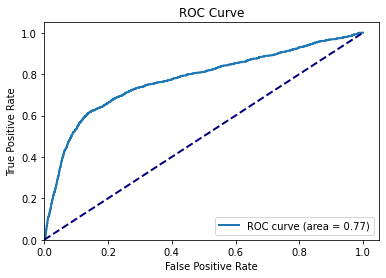

-----------------random forest-------------
Classification Report

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     10953
           1       0.58      0.24      0.34      1398

    accuracy                           0.89     12351
   macro avg       0.75      0.61      0.64     12351
weighted avg       0.87      0.89      0.87     12351

Confusion Matrix

[[10717   236]
 [ 1069   329]]

accuracy score 0.8943405392275929


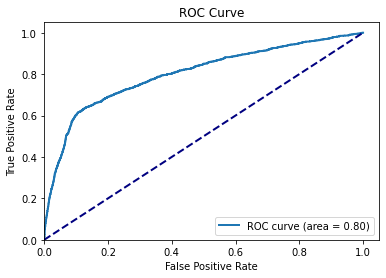

-----------------Support Vector Machine-------------
Classification Report

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     10953
           1       0.59      0.25      0.35      1398

    accuracy                           0.90     12351
   macro avg       0.75      0.61      0.65     12351
weighted avg       0.87      0.90      0.88     12351

Confusion Matrix

[[10716   237]
 [ 1052   346]]

accuracy score 0.8956359808922354


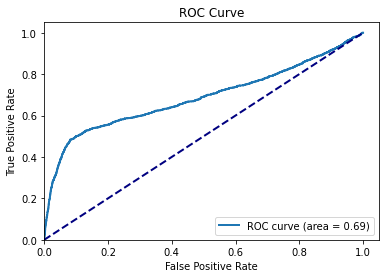

In [32]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop('y',axis=1))

# X and Y scale

X = pd.DataFrame(scaler.transform(df.drop('y',axis=1)), columns=df.columns.drop("y"))
Y = df['y']

# logistic Regression

## Split the test data 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=231) # 0.25/11

from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(max_iter=10000)
logmodel.fit(X_train,y_train)

# Logistic Regression evaluation

print ("-----------------logistic regressions-------------")
predictions = logmodel.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print('Classification Report\n')
print(classification_report(y_test,predictions))
print('Confusion Matrix\n')
print(confusion_matrix(y_test,predictions))
print(f'\naccuracy score {accuracy_score(y_test,predictions)}')

# AUC ROC

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

predictions = logmodel.decision_function(X_test) 

fpr, tpr, _ = roc_curve(y_true=y_test, y_score=predictions)
roc_auc = roc_auc_score(y_test, predictions)

plt.figure()
lw=2
plt.plot(
    fpr,
    tpr,
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)

zz0 = zip(fpr,tpr)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0, 1.05])
plt.ylim([0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

# CV Logistic Regerssions
print ("-----------------CV logistic regressions-------------")

from sklearn.linear_model import LogisticRegressionCV
clf = LogisticRegressionCV(cv=5, random_state=0).fit(X, Y)

predictions = clf.predict(X_test)
print('Classification Report\n')
print(classification_report(y_test,predictions))
print('Confusion Matrix\n')
print(confusion_matrix(y_test,predictions))
print(f'\naccuracy score {accuracy_score(y_test,predictions)}')

# AUC ROC
predictions = clf.decision_function(X_test) 
fpr, tpr, _ = roc_curve(y_true=y_test, y_score=predictions)
roc_auc = roc_auc_score(y_test, predictions)

plt.figure()
lw=2
plt.plot(
    fpr,
    tpr,
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)

zz = zip(fpr, tpr)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0, 1.05])
plt.ylim([0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

# Random Forest
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=800, max_depth=10,min_samples_leaf=12 )
rfc.fit(X_train,y_train)

predictions = rfc.predict(X_test)

print ("-----------------random forest-------------")

print('Classification Report\n')
print(classification_report(y_test,predictions))
print('Confusion Matrix\n')
print(confusion_matrix(y_test,predictions))
print(f'\naccuracy score {accuracy_score(y_test,predictions)}')

predictions = rfc.predict_proba(X_test)[:,1]

fpr, tpr, _ = roc_curve(y_true=y_test, y_score=predictions)
roc_auc = roc_auc_score(y_test, predictions)

plt.figure()
lw=2
plt.plot(
    fpr,
    tpr,
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0, 1.05])
plt.ylim([0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

# SVM

from sklearn.svm import SVC
svc = SVC(probability=True, C=10, gamma=0.01)
svc.fit(X_train,y_train)

print ("-----------------Support Vector Machine-------------")
predictions = svc.predict(X_test)
print('Classification Report\n')
print(classification_report(y_test,predictions))
print('Confusion Matrix\n')
print(confusion_matrix(y_test,predictions))
print(f'\naccuracy score {accuracy_score(y_test,predictions)}')

predictions = svc.predict_proba(X_test)[:,1]

fpr, tpr, _ = roc_curve(y_true=y_test, y_score=predictions)
roc_auc = roc_auc_score(y_test, predictions)

plt.figure()
lw=2
plt.plot(
    fpr,
    tpr,
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0, 1.05])
plt.ylim([0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()


Text(0.5, 1.0, 'Coefficients of logistic regression')

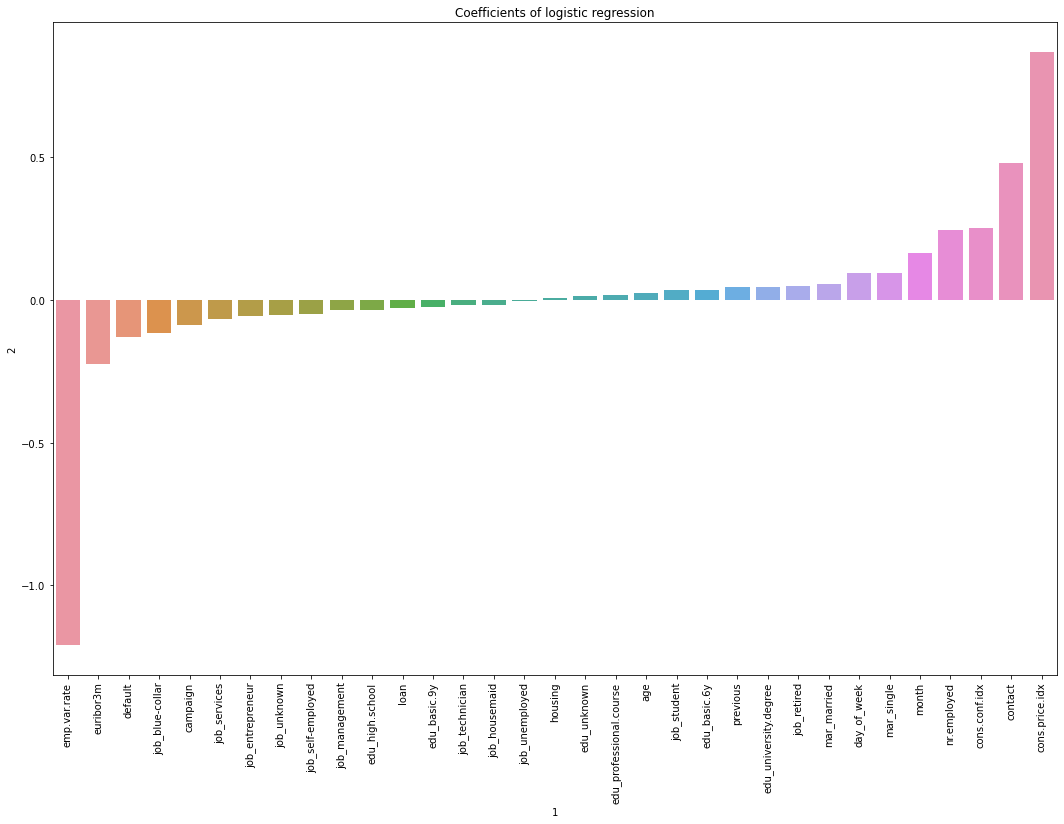

In [72]:
fig = plt.figure(figsize=(18,12))
ll = pd.DataFrame(list(X_test.columns))
qq = pd.DataFrame(logmodel.coef_[0])
rr = pd.concat([ll,qq],axis=1)
rr.columns = [1,2]
rr.sort_values(by=2,axis=0,inplace=True)
plt.xticks(rotation=90)
sns.barplot(x=1,y=2,data=rr).set_title("Coefficients of logistic regression")


In [ ]:
# SVC hyperparameter tuning
from sklearn.model_selection import GridSearchCV
#param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000], 'gamma': [100,10,1,0.1,0.01,0.001,0.0001]} 
param_grid = {'C': [0.01,0.1,1,10,100], 'gamma': [0.001,0.01, 0.1, 1,10,100]} 

grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=0,n_jobs=16) # C=10, gamma=0.01 score=0.8945
grid.fit(X_train,y_train)

#then grid.best_estimator_ and grid.best_estimator_

In [ ]:
# Random Forest hyperparameter tuning
from sklearn.model_selection import GridSearchCV
#param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000], 'gamma': [100,10,1,0.1,0.01,0.001,0.0001]} 
param_grid = {'max_depth': [10], 'min_samples_leaf': [10,12,14], 'min_samples_split':[2]} 

grid = GridSearchCV(RandomForestClassifier(),param_grid,refit=True,verbose=0)
grid.fit(X_train,y_train)

# Discussion and Conclusion
The biggest takeaway is that these steps actually work. The output at each step was in line with my expectations, even at the first attempt without any optimization.

I also learned that the exploratory analysis and the domain knowledge make a difference. The iterative model development process was driven by my understanding on the data, and it was not as mechanical as I anticipated.

The models showed about 90% accuracy. Considering that the correlation from each feature to the target was small (all of them are between -0.3 and 0.3), leveraging higher degrees and interactions of features may improve the model performance. I would like to try it later.

The input dataset contained only simple and static data. I would be interested in using dynamic data such as a series of consumer behaviors and see how it improves the models.

